In [ ]:
!pip install statsmodels --upgrade
# from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 4.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount("/content/grive")

Mounted at /content/grive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler


*italicized text*











#                                                          **S&P Analysis**

In [ ]:
# Reading dataset
stock_data=pd.read_csv("/content/grive/MyDrive/Colab Notebooks/Technical and Economics Data/S&P500_HistoricalData_1656311331506.csv")
stock_data.head()

,Date,Close/Last,Volume,Open,High,Low
0,06/24/2022,3911.74,--,3821.75,3913.65,3821.75
1,06/23/2022,3795.73,--,3774.71,3802.58,3743.52
2,06/22/2022,3759.89,--,3733.89,3801.79,3717.69
3,06/21/2022,3764.79,--,3715.31,3779.65,3715.31
4,06/17/2022,3674.84,--,3665.90,3707.71,3636.87


DATA CLEANING

As volume contains null value and volume means the number of shares bought or sold during the paricular period i.e. can't be calculated from given dataset. So removing the volume column.

In [ ]:
std_1=stock_data.copy()
std_1["Volume"]=std_1["Volume"].replace("--",np.nan)
std_1 = std_1.dropna(axis=1)
std_1.head()

,Date,Close/Last,Open,High,Low
0,06/24/2022,3911.74,3821.75,3913.65,3821.75
1,06/23/2022,3795.73,3774.71,3802.58,3743.52
2,06/22/2022,3759.89,3733.89,3801.79,3717.69
3,06/21/2022,3764.79,3715.31,3779.65,3715.31
4,06/17/2022,3674.84,3665.90,3707.71,3636.87


In [ ]:
std_1["High"].value_counts()

0.00       33
2578.29     2
2761.85     2
2674.35     2
2074.28     2
           ..
2816.88     1
2808.02     1
2793.73     1
2795.76     1
1334.40     1
Name: High, Length: 2497, dtype: int64

Since 33 rows of column Close/Last, High, Low is having 0.00 value. They belong to the date of christmas,new year,etc.. So, removing such missing rows.

In [ ]:
std_2 = std_1.copy()
std_2["High"]=std_2["High"].replace(0, np.nan)
std_2=std_2.dropna(axis=0)
std_2.head()

,Date,Close/Last,Open,High,Low
0,06/24/2022,3911.74,3821.75,3913.65,3821.75
1,06/23/2022,3795.73,3774.71,3802.58,3743.52
2,06/22/2022,3759.89,3733.89,3801.79,3717.69
3,06/21/2022,3764.79,3715.31,3779.65,3715.31
4,06/17/2022,3674.84,3665.90,3707.71,3636.87


In [ ]:
std_2.shape

(2515, 5)

In [ ]:
# converting date column to datetime format to access day, month and year 
std_2["Date"]=pd.to_datetime(std_2["Date"],format="%m/%d/%Y")
std_2

,Date,Close/Last,Open,High,Low
0,2022-06-24,3911.74,3821.75,3913.65,3821.75
1,2022-06-23,3795.73,3774.71,3802.58,3743.52
2,2022-06-22,3759.89,3733.89,3801.79,3717.69
3,2022-06-21,3764.79,3715.31,3779.65,3715.31
4,2022-06-17,3674.84,3665.90,3707.71,3636.87
...,...,...,...,...,...
2543,2012-07-03,1374.02,1365.75,1374.81,1363.53
2544,2012-07-02,1365.51,1362.33,1366.35,1355.70
2545,2012-06-29,1362.16,1330.12,1362.17,1330.12
2546,2012-06-28,1329.04,1331.52,1331.52,1313.29


Checking for Outliers in Close/last column w.r.t to years.

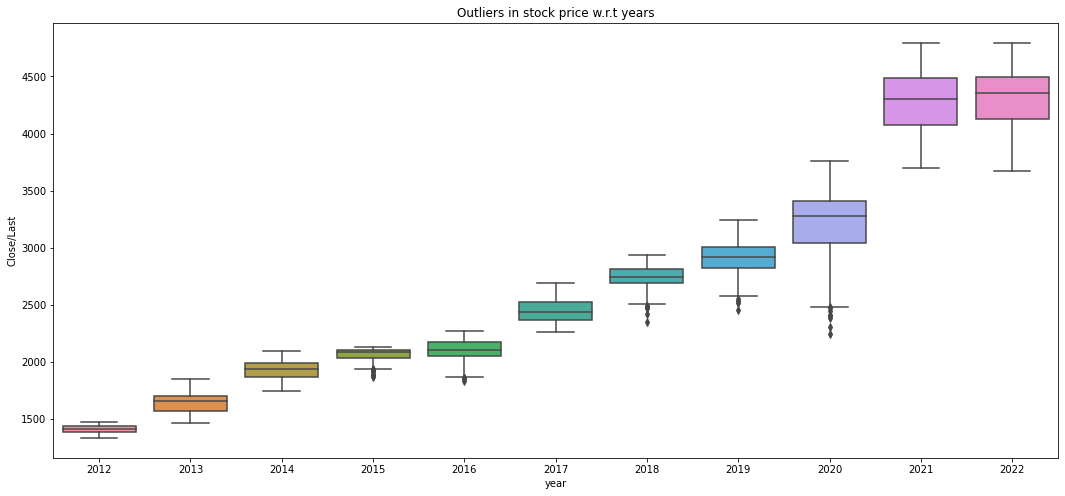

In [ ]:
std_2["year"]=std_2["Date"].dt.year
plt.figure(figsize=(18,8))
plt.title("Outliers in stock price w.r.t years")
sns.boxplot(x=std_2.year,y= std_2["Close/Last"])

From box-plot it is clear theat in year 2015, 2016, 2018, 2019, 2020 is having outliers with their closing price. So we need to remove outliers from these years.

In [ ]:
#  bifuracting years w.r.t one which are having outliers. 
c=[2015,2016,2018,2019,2020]
y=[]
for i in c:
  s= std_2[std_2.year==i]
  y.append(s)
print(y)  

# bifuracting years w.r.t one which is not having outliers
d=[2012,2013,2014,2017,2021,2022]
k=[]
for i in d:
  b = std_2[std_2.year==i]
  k.append(b)

[           Date  Close/Last     Open     High      Low  year
1631 2015-12-31     2043.94  2060.59  2062.54  2043.62  2015
1632 2015-12-30     2063.36  2077.34  2077.34  2061.97  2015
1633 2015-12-29     2078.36  2060.54  2081.56  2060.54  2015
1634 2015-12-28     2056.50  2057.77  2057.77  2044.20  2015
1636 2015-12-24     2060.99  2063.52  2067.36  2058.73  2015
...         ...         ...      ...      ...      ...   ...
1886 2015-01-08     2062.14  2030.61  2064.08  2030.61  2015
1887 2015-01-07     2025.90  2005.55  2029.61  2005.55  2015
1888 2015-01-06     2002.61  2022.15  2030.25  1992.44  2015
1889 2015-01-05     2020.58  2054.44  2054.44  2017.34  2015
1890 2015-01-02     2058.20  2058.90  2072.36  2046.04  2015

[252 rows x 6 columns],            Date  Close/Last     Open     High      Low  year
1379 2016-12-30     2238.83  2251.61  2253.58  2233.62  2016
1380 2016-12-29     2249.26  2249.50  2254.51  2244.56  2016
1381 2016-12-28     2249.92  2270.23  2271.31  2249.11  201

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

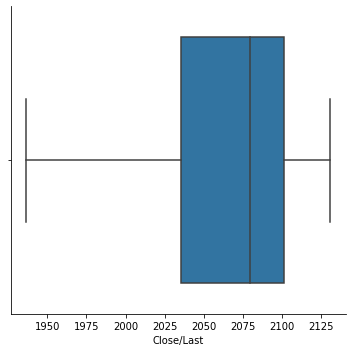

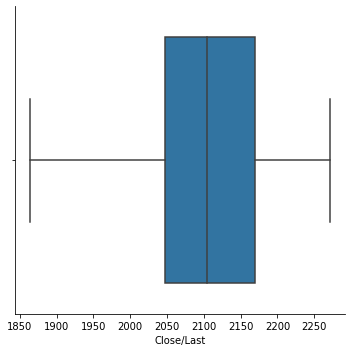

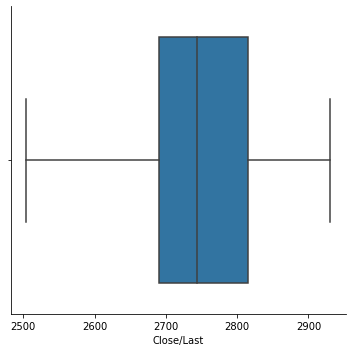

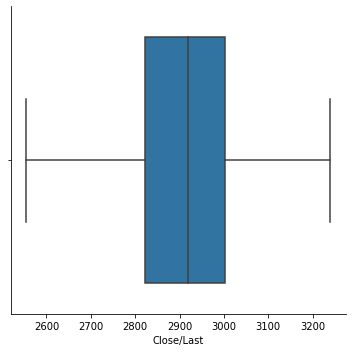

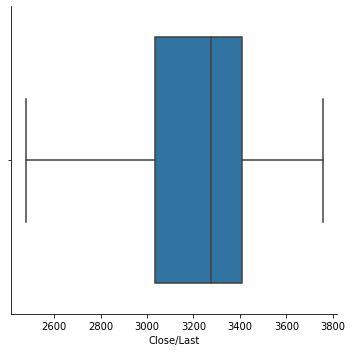

In [ ]:
# removing outliers
def remove_outliers(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR= Q3- Q1
    lower_range = Q1-(1.5*IQR)
    upper_range= Q3 + (1.5*IQR)
    return lower_range,upper_range
for i in y:
  low_point,high_point= remove_outliers(i["Close/Last"])
  i["Close/Last"]= np.where(i["Close/Last"]>high_point,high_point,i["Close/Last"])
  i["Close/Last"]= np.where(i["Close/Last"]<low_point,low_point,i["Close/Last"])
  sns.catplot(x="Close/Last", data= i, kind="box")


In [ ]:
# merging all the year dataframes into one and naming it new_s_p500
new_s_p500=pd.concat([k[0],k[1],k[2],y[0],y[1],k[3],y[2],y[3],y[4],k[4],k[5]],axis=0)
new_s_p500

,Date,Close/Last,Open,High,Low,year
2414,2012-12-31,1426.19,1402.43,1426.74,1398.11,2012
2415,2012-12-28,1402.43,1418.10,1418.10,1401.58,2012
2416,2012-12-27,1418.10,1419.83,1422.80,1401.80,2012
2417,2012-12-26,1419.83,1426.66,1429.42,1416.43,2012
2419,2012-12-24,1426.66,1430.15,1430.15,1424.66,2012
...,...,...,...,...,...,...
115,2022-01-07,4677.03,4697.66,4707.95,4662.74,2022
116,2022-01-06,4696.05,4693.39,4725.01,4671.26,2022
117,2022-01-05,4700.58,4787.99,4797.70,4699.44,2022
118,2022-01-04,4793.54,4804.51,4818.62,4774.27,2022


In [ ]:
# checking for informations on new dataset created
print(new_s_p500.info())
print(new_s_p500.describe())
print(new_s_p500.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2515 entries, 2414 to 119
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2515 non-null   datetime64[ns]
 1   Close/Last  2515 non-null   float64       
 2   Open        2515 non-null   float64       
 3   High        2515 non-null   float64       
 4   Low         2515 non-null   float64       
 5   year        2515 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 137.5 KB
None
        Close/Last         Open         High          Low         year
count  2515.000000  2515.000000  2515.000000  2515.000000  2515.000000
mean   2614.375432  2613.362195  2626.815336  2598.650159  2016.984891
std     873.786361   874.289398   879.979788   867.684617     2.912638
min    1329.040000  1320.710000  1331.520000  1313.290000  2012.000000
25%    1985.245000  1983.780000  1991.395000  1974.815000  2014.000000
50%   

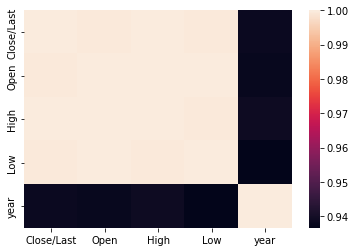

In [ ]:
# Correlation among features
sns.heatmap(new_s_p500.corr())

In [ ]:
# # Standardizing the last close/Last price
# def normal(df, col):
#    std_scale=StandardScaler(copy=True, with_mean=True, with_std=True)
#    df[col]=std_scale.fit_transform(df[[col]])
# normal(new_s_p500,"Close/Last")
# normal(new_s_p500,"Open")
# normal(new_s_p500,"High")
# normal(new_s_p500,"Low")
# new_s_p500

       Close/Last
year             
2012  1407.869141
2013  1643.798968
2014  1931.376111
2015  2062.233790
2016  2094.946022
2017  2449.076375
2018  2747.585418
2019  2914.052222
2020  3220.582055
2021  4273.406627
2022  4299.871083


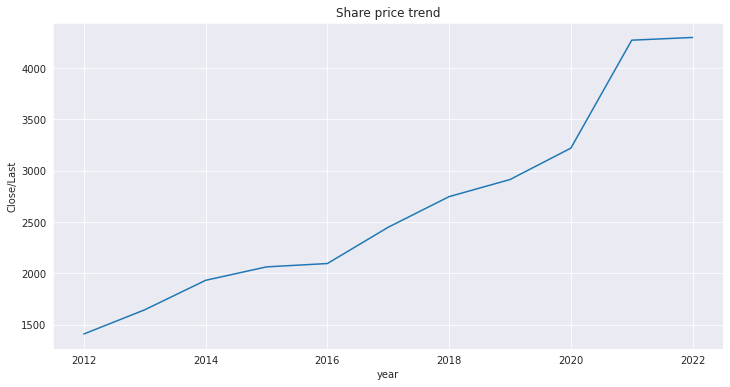

In [ ]:
# plotting to visualise trend of share price w.r.t year
x_2 =new_s_p500.pivot_table(values="Close/Last", index="year", aggfunc=np.mean)
print(x_2)
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
plt.title("Share price trend")
sns.lineplot(data=x_2["Close/Last"])

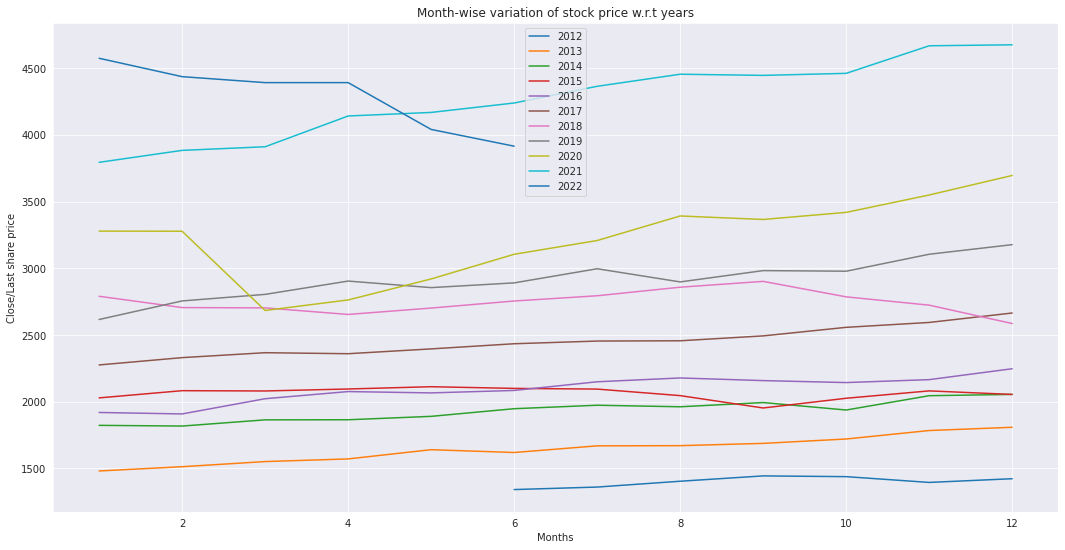

In [ ]:
# creating month wise mean data for share price.
x_3 =new_s_p500.pivot_table(values="Close/Last", index="year",columns=new_s_p500["Date"].dt.month, aggfunc=np.mean)
plt.figure(figsize=(18,9))
plt.xlabel("Months")
plt.title("Month-wise variation of stock price w.r.t years")
plt.ylabel("Close/Last share price")
month_vary=[2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]
for i in month_vary:
  sns.lineplot(x=x_3.columns, y=x_3.loc[i,:], label=str(i))


**"All over month wise variation of closing share price"**

**Stochastic indicator analysis**

In [ ]:
# sorting date column
new_s_p500=new_s_p500.sort_values("Date", ascending=True)
new_s_p500

,Date,Close/Last,Open,High,Low,year
2547,2012-06-27,1331.85,1320.71,1334.40,1320.71,2012
2546,2012-06-28,1329.04,1331.52,1331.52,1313.29,2012
2545,2012-06-29,1362.16,1330.12,1362.17,1330.12,2012
2544,2012-07-02,1365.51,1362.33,1366.35,1355.70,2012
2543,2012-07-03,1374.02,1365.75,1374.81,1363.53,2012
...,...,...,...,...,...,...
4,2022-06-17,3674.84,3665.90,3707.71,3636.87,2022
3,2022-06-21,3764.79,3715.31,3779.65,3715.31,2022
2,2022-06-22,3759.89,3733.89,3801.79,3717.69,2022
1,2022-06-23,3795.73,3774.71,3802.58,3743.52,2022


In [ ]:
# adding 14-low and 14-high column that shows the minimum and max last close share price in last 14-moving average period 
new_s_p500["14-Low"]=new_s_p500["Low"].rolling(14).min()
new_s_p500["14-High"]=new_s_p500["High"].rolling(14).max()
# adding  %K and %D column 
new_s_p500["%K"]=((new_s_p500["Close/Last"]-new_s_p500["14-Low"])*100)/(new_s_p500["14-High"]-new_s_p500["14-Low"])
new_s_p500["%D"]=new_s_p500["%K"].rolling(3).mean()
new_s_p500.tail()

,Date,Close/Last,Open,High,Low,year,14-Low,14-High,%K,%D
4,2022-06-17,3674.84,3665.90,3707.71,3636.87,2022,3636.87,4177.51,7.023158,9.970965
3,2022-06-21,3764.79,3715.31,3779.65,3715.31,2022,3636.87,4177.51,23.660846,11.901673
2,2022-06-22,3759.89,3733.89,3801.79,3717.69,2022,3636.87,4177.51,22.754513,17.812839
1,2022-06-23,3795.73,3774.71,3802.58,3743.52,2022,3636.87,4168.78,29.865955,25.427105
0,2022-06-24,3911.74,3821.75,3913.65,3821.75,2022,3636.87,4168.78,51.676035,34.765501


In [ ]:
# Doing analysis for the recent years like 2021 and 2022
x_4=new_s_p500[new_s_p500.year==2021]
x_5=new_s_p500[new_s_p500.year==2022]
print(x_4)
x_4.dtypes

          Date  Close/Last     Open     High      Low  year   14-Low  14-High  \
371 2021-01-04     3700.65  3764.61  3769.99  3662.71  2021  3636.48  3769.99   
370 2021-01-05     3726.86  3698.02  3737.83  3695.07  2021  3636.48  3769.99   
369 2021-01-06     3748.14  3712.20  3783.04  3705.34  2021  3636.48  3783.04   
368 2021-01-07     3803.79  3764.71  3811.55  3764.71  2021  3636.48  3811.55   
367 2021-01-08     3824.68  3815.05  3826.69  3783.60  2021  3636.48  3826.69   
..         ...         ...      ...      ...      ...   ...      ...      ...   
124 2021-12-27     4791.19  4733.99  4791.49  4733.99  2021  4531.10  4791.49   
123 2021-12-28     4786.35  4795.49  4807.02  4780.04  2021  4531.10  4807.02   
122 2021-12-29     4793.06  4788.64  4804.06  4778.08  2021  4531.10  4807.02   
121 2021-12-30     4778.73  4794.23  4808.93  4775.33  2021  4531.10  4808.93   
120 2021-12-31     4766.18  4775.21  4786.83  4765.75  2021  4531.10  4808.93   

            %K         %D  

Date          datetime64[ns]
Close/Last           float64
Open                 float64
High                 float64
Low                  float64
year                   int64
14-Low               float64
14-High              float64
%K                   float64
%D                   float64
dtype: object

[]

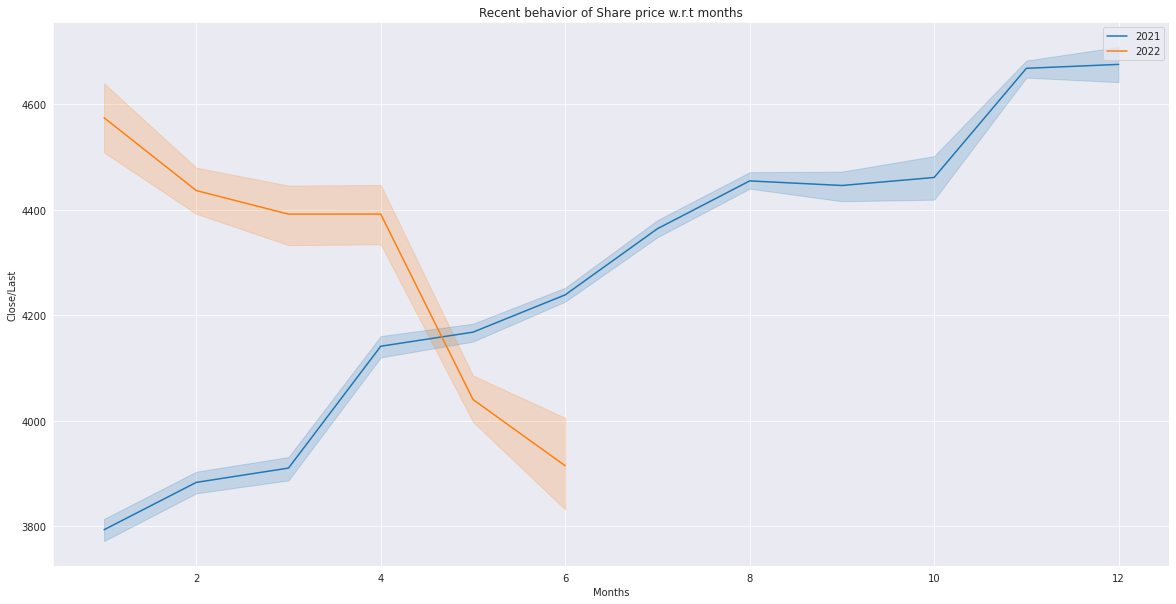

In [ ]:
# plot for recent month-wise change in closing share price  
plt.figure(figsize=(20,10))
sns.lineplot(x=x_4["Date"].dt.month, y=x_4["Close/Last"], label="2021")
plt.title("Recent behavior of Share price w.r.t months")
plt.xlabel("Months")
sns.lineplot(x=x_5["Date"].dt.month, y=x_5["Close/Last"], label="2022")
plt.plot()

This chart clearly shows there is fall in closing share price for the year 2022. We have to analyse the reason for this fall with economic analysis.

[]

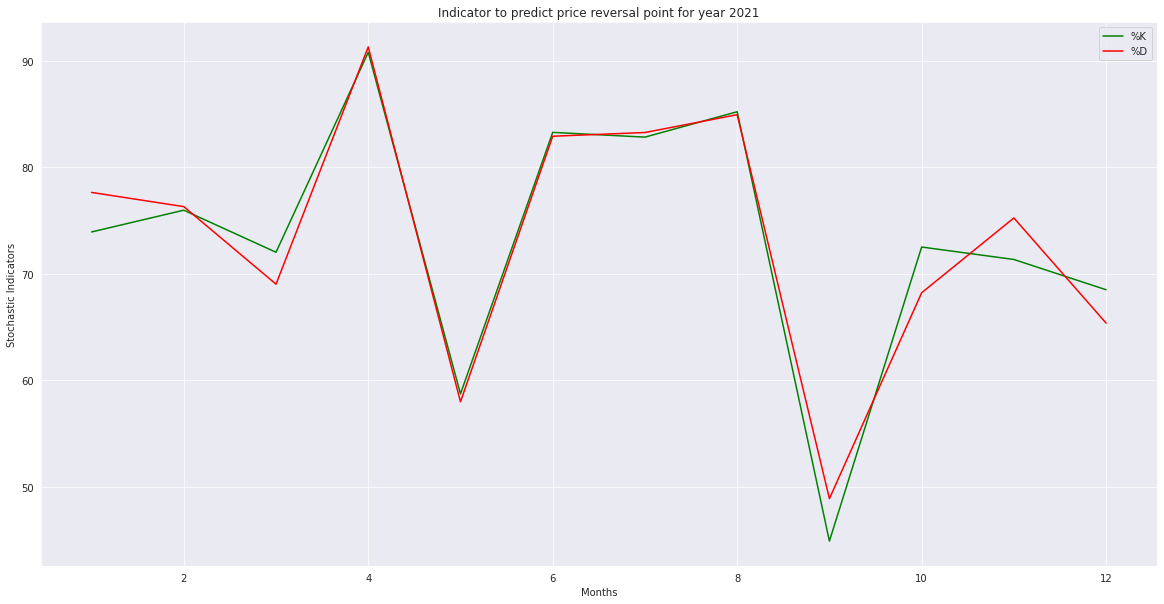

In [ ]:
# stocahstic indicator plot for year 2021
plt.figure(figsize=(20,10))
a=sns.lineplot(x=x_4["Date"].dt.month, y=x_4["%K"],ci=None,color="green",label="%K")
plt.xlabel("Months")
plt.title("Indicator to predict price reversal point for year 2021")
plt.ylabel("Stochastic Indicators")
sns.lineplot(x=x_4["Date"].dt.month, y=x_4["%D"],ci=None,color="red", label="%D")
plt.plot()

Above chart is the monthly stochastic indicator chart of year 2021.
When the stochastic indicator is at a high level, it means the share price closed near the top of the 14-period range and when the indicator is at a low level, it signals the share price closed near the bottom of the 14-period range. If the closing price slips away from the high or low, it signals that momentum​​ is slowing.

In [ ]:
# setting date as index
x_4=x_4.set_index("Date")
x_4

,Close/Last,Open,High,Low,year,14-Low,14-High,%K,%D
Date,,,,,,,,,
2021-01-04,3700.65,3764.61,3769.99,3662.71,2021,3636.48,3769.99,48.063815,75.061605
2021-01-05,3726.86,3698.02,3737.83,3695.07,2021,3636.48,3769.99,67.695304,70.834007
2021-01-06,3748.14,3712.20,3783.04,3705.34,2021,3636.48,3783.04,76.187227,63.982115
2021-01-07,3803.79,3764.71,3811.55,3764.71,2021,3636.48,3811.55,95.567487,79.816673
2021-01-08,3824.68,3815.05,3826.69,3783.60,2021,3636.48,3826.69,98.943273,90.232663
...,...,...,...,...,...,...,...,...,...
2021-12-27,4791.19,4733.99,4791.49,4733.99,2021,4531.10,4791.49,99.884788,92.598648
2021-12-28,4786.35,4795.49,4807.02,4780.04,2021,4531.10,4807.02,92.508698,95.087405
2021-12-29,4793.06,4788.64,4804.06,4778.08,2021,4531.10,4807.02,94.940562,95.778016


In [ ]:
#  CandleStick plot for year 2021
figure=go.Figure(
    data=[
          go.Candlestick(
              x=x_4.index, 
              low=x_4["Low"],
              high= x_4["High"],
              close=x_4["Close/Last"],
              open=x_4["Open"],
              increasing_line_color="green",
              decreasing_line_color="Red")
          ]
          )
figure.show()

[]

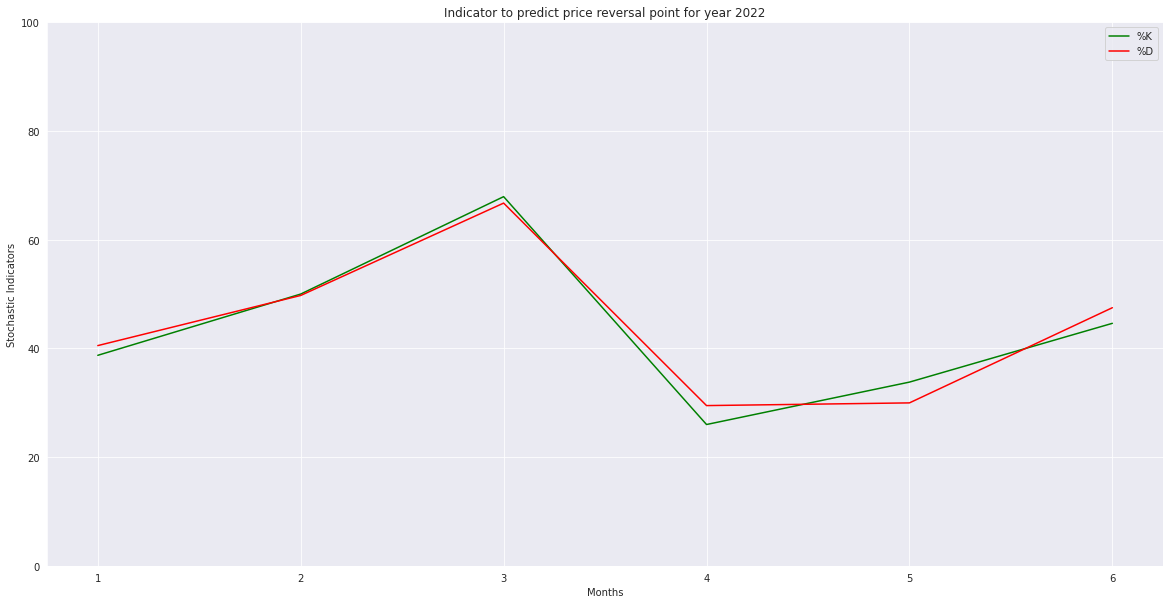

In [ ]:
# stocahstic indicator plot for year 2022
plt.figure(figsize=(20,10))
g=sns.lineplot(x=x_5["Date"].dt.month, y=x_5["%K"],ci=None,color="green",label="%K")
plt.xlabel("Months")
plt.ylabel("Stochastic Indicators")
plt.title("Indicator to predict price reversal point for year 2022")
g.set_ylim(0,100)
h=sns.lineplot(x=x_5["Date"].dt.month, y=x_5["%D"],ci=None,color="red", label="%D")
h.set_ylim(0,100)
plt.plot()

In [ ]:
# setting index to Date
x_5=x_5.set_index("Date")
x_5

,Close/Last,Open,High,Low,year,14-Low,14-High,%K,%D
Date,,,,,,,,,
2022-01-03,4796.56,4778.14,4796.64,4758.17,2022,4531.10,4808.93,95.547637,89.763524
2022-01-04,4793.54,4804.51,4818.62,4774.27,2022,4531.10,4818.62,91.277129,90.479219
2022-01-05,4700.58,4787.99,4797.70,4699.44,2022,4531.10,4818.62,58.945465,81.923410
2022-01-06,4696.05,4693.39,4725.01,4671.26,2022,4531.10,4818.62,57.369922,69.197505
2022-01-07,4677.03,4697.66,4707.95,4662.74,2022,4531.10,4818.62,50.754730,55.690039
...,...,...,...,...,...,...,...,...,...
2022-06-17,3674.84,3665.90,3707.71,3636.87,2022,3636.87,4177.51,7.023158,9.970965
2022-06-21,3764.79,3715.31,3779.65,3715.31,2022,3636.87,4177.51,23.660846,11.901673
2022-06-22,3759.89,3733.89,3801.79,3717.69,2022,3636.87,4177.51,22.754513,17.812839


In [ ]:
# Candlestick plot for year 2022
figure=go.Figure(
    data=[
          go.Candlestick(
              x=x_5.index, 
              low=x_5["Low"],
              high= x_5["High"],
              close=x_5["Close/Last"],
              open=x_5["Open"],
              increasing_line_color="green",
              decreasing_line_color="Red")
          ]
          )
figure.show()

We have seen the trends of closing share price w.r.t years. So recent period candlestick plot and stochastic indicator helps in better analysis of how the share price is behaving in recent days. It will help in predicting the share price for coming days.

In [ ]:
# normalizing the close/last price column
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(new_s_p500["Close/Last"]).reshape(-1,1))
print(df1)

[[0.02801714]
 [0.02116498]
 [0.02568406]
 ...
 [0.97232028]
 [0.99912906]
 [1.        ]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size, test_size

(1634, 881)

In [ ]:
train_data

array([[0.02801714],
       [0.02116498],
       [0.02568406],
       ...,
       [0.40928098],
       [0.41016346],
       [0.40913102]])

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(ytest.shape)

(1623, 10)
(1623,)
(870, 10)
(870,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
26/26 [==============================] - 8s 84ms/step - loss: 0.0121 - val_loss: 0.0257
Epoch 2/100
26/26 [==============================] - 1s 28ms/step - loss: 0.0012 - val_loss: 0.0049
Epoch 3/100
26/26 [==============================] - 1s 27ms/step - loss: 4.9662e-04 - val_loss: 0.0027
Epoch 4/100
26/26 [==============================] - 1s 27ms/step - loss: 4.7117e-04 - val_loss: 0.0034
Epoch 5/100
26/26 [==============================] - 1s 28ms/step - loss: 4.8374e-04 - val_loss: 0.0027
Epoch 6/100
26/26 [==============================] - 1s 27ms/step - loss: 4.7813e-04 - val_loss: 0.0027
Epoch 7/100
26/26 [==============================] - 1s 28ms/step - loss: 4.5742e-04 - val_loss: 0.0025
Epoch 8/100
26/26 [==============================] - 1s 27ms/step - loss: 4.5230e-04 - val_loss: 0.0027
Epoch 9/100
26/26 [==============================] - 1s 27ms/step - loss: 4.5774e-04 - val_loss: 0.0027
Epoch 10/100
26/26 [==============================] - 1s 28ms/step - los

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

2126.3521982950965

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

3596.827151746598

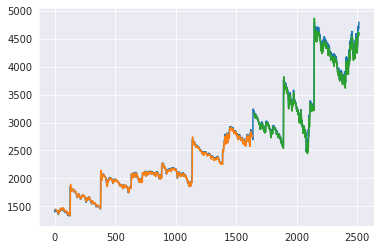

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

881

In [ ]:
x_input=test_data[871:].reshape(1,-1)
x_input.shape

(1, 10)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.9614392995570322,
 0.9603376476559615,
 0.9797520994832043,
 0.975922272978959,
 0.9635849252491693,
 0.9655286775562937,
 0.9710138658176448,
 0.9723202750092284,
 0.9991290605389442,
 1.0]

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<10):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9756005]
11
[0.9756005]
12
[0.9756005]
13
[0.9756005]
14
[0.9756005]
15
[0.9756005]
16
[0.9756005]
17
[0.9756005]
18
[0.9756005]
19
[0.9756005]
20
[[0.9756004810333252], [0.9756004810333252], [0.9756004810333252], [0.9756004810333252], [0.9756004810333252], [0.9756004810333252], [0.9756004810333252], [0.9756004810333252], [0.9756004810333252], [0.9756004810333252]]


In [ ]:
day_new=np.arange(1,10)
day_pred=np.arange(11,16)

In [ ]:
len(df1)

2515

ValueError: ignored

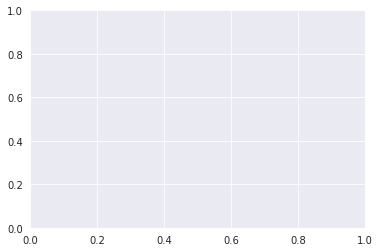

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[2415:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2375:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)













#                                                          **Fed Rate Analysis**

In [ ]:
# Reading fed rate data set
fed_rate=pd.read_csv("/content/grive/MyDrive/Colab Notebooks/Technical and Economics Data/FEDFUNDS_DATA.csv")
fed_rate.head()

In [ ]:
# Basic information
print(fed_rate.info())
print(fed_rate["FEDFUNDS"].value_counts())
fed_rate["FEDFUNDS"].isnull().sum()

In [ ]:
# checking for outliers
sns.catplot(x="FEDFUNDS", data= fed_rate, kind="box")

In [ ]:
# converting date to date_time type
fed_rate["DATE"]= pd.to_datetime(fed_rate["DATE"], format="%Y/%m/%d")
fed_rate["years"]= fed_rate["DATE"].dt.year
fed_rate

In [ ]:
# trend for variation in fed rate w.r.t years
s1= fed_rate.pivot_table(values="FEDFUNDS", index="years",aggfunc=np.mean)
plt.figure(figsize=(18,6))
a=sns.lineplot(x=s1.index,y=s1["FEDFUNDS"])
a.set_xlim(1954,2022)
plt.xticks(rotation=90)

Analysis for years form 2012 to 2022

In [ ]:
x2=fed_rate.set_index("years")
x3=x2.loc[[2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022],:]
x4=x3.pivot_table(index="years", values="FEDFUNDS",columns=x3["DATE"].dt.month)
x4

In [ ]:
plt.figure(figsize=(18,9))
plt.xlabel("Months")
plt.title("Month-wise variation of FEDFUNDS w.r.t years")
plt.ylabel("FEDFUND RATE")
month_vary=[2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]
for i in month_vary:
  sns.lineplot(x=x4.columns, y=x4.loc[i,:], label=str(i))

In [ ]:
# Standardizing Fed fund rates
normal(fed_rate,"FEDFUNDS")
fed_rate

We can see the abnormal variations in the fedrate in different months of year like 2020,2018,2019,2022.
In GDP analysis and S&P share price we will see the impact of changes in fedrate. In S&P500 there is a impact in stock price due to fluctuations in fed rate. 













#                                                          **PPI Analysis**

In [ ]:
ppidata = pd.read_csv("/content/grive/MyDrive/Colab Notebooks/Technical and Economics Data/DP_LIVE_27062022082631724.csv")
ppidata.head()

In [ ]:
# Informations on dataset
print(ppidata.info())
print(ppidata.isnull().sum())
check2=ppidata["LOCATION"].unique()
check2

In [ ]:
# DATA CLEANING
# Only Flag Codes is having null values.
# Indicator column doesn't contributes in value.
# Removing flag codes and Indicator column
ppidata.drop(["Flag Codes","INDICATOR"], inplace = True, axis = 1)
ppidata.head()


In [ ]:
# Distribution of PPI dataset w.r.t categorical columns like SUBJECT and MEASURE
plt.title("Distribution of datas w.r.t categorical parameters")
sns.countplot(x=ppidata["SUBJECT"], hue=ppidata["MEASURE"])

In [ ]:
# Splitting the data based on annual, quarter and month basis
ppi_a_data = ppidata[(ppidata["FREQUENCY"]=="A")]
ppi_q_data = ppidata[ppidata["FREQUENCY"]=="Q"]
ppi_m_data = ppidata[ppidata["FREQUENCY"]=="M"]

PPI TREND VISUALIZTAION

In [ ]:
ppi_a_data.sort_values("TIME")

In [ ]:
# Function to see the variation in PPI of any country
def ppi_annual(country,measure):
  x = ppi_a_data[(ppi_a_data["LOCATION"]== country) & (ppi_a_data["MEASURE"]== measure) & (ppi_a_data["SUBJECT"]=="DOMESTIC")]
  y = ppi_a_data[(ppi_a_data["LOCATION"]== country) & (ppi_a_data["MEASURE"]== measure) & (ppi_a_data["SUBJECT"]== "TOT_MKT")]
  sns.lineplot(x="TIME", y="Value", data =x, label = 'DOMESTIC '+country)
  sns.lineplot(x="TIME", y="Value", data =y, label = 'TOT_MKT '+country)
  plt.axhline(0, color = 'red')
  plt.axvline(0, color = 'red')
  plt.xticks(rotation=90)

In [ ]:
plt.figure(figsize=(20,8))
plt.title("PPI ANNUAL TREND")
ppi_annual("USA", "AGRWTH")
ppi_annual("CAN", "AGRWTH")
ppi_annual("GBR", "IDX2015")
ppi_annual("JPN", "IDX2015")


In [ ]:
# spliting TIME column to year and type , to bifurcate every quarters and months
ppidata1=ppidata.copy()
ppidata1.drop("FREQUENCY", inplace = True, axis = 1)
ppidata1[["Year","Type"]] = ppidata1.TIME.str.split("-", expand = True)
ppidata1.drop("TIME", axis =1 , inplace = True)
ppidata1.Type.fillna(value = "Ann", inplace = True)
ppidata1

In [ ]:
# Quarter wise analysis
ppi_q_1=ppidata1.copy()
ppi_q_1 = ppidata1[ppidata1["Type"].isin(["Q1","Q2","Q3","Q4"])]
ppi_q_1.head()                     

In [ ]:
# function to see the variation of PPI value w.r.t quarters
def ppi_quat(country,measure,Year):
  x = ppi_q_1[(ppi_q_1["LOCATION"]== country) & (ppi_q_1["MEASURE"]== measure) & (ppi_q_1["Year"]==Year) & (ppi_q_1["SUBJECT"]=="DOMESTIC")]
  y = ppi_q_1[(ppi_q_1["LOCATION"]== country) & (ppi_q_1["MEASURE"]== measure) & (ppi_q_1["Year"]==Year) & (ppi_q_1["SUBJECT"]== "TOT_MKT")]
  sns.lineplot(x="Type", y="Value", data =x, label = 'DOMESTIC '+country)
  sns.lineplot(x="Type", y="Value", data =y, label = 'TOT_MKT '+country)
  plt.axhline(0, color = 'red')
  plt.axvline(0, color = 'red')

In [ ]:
plt.figure(figsize=(20,8))
ppi_quat("JPN", "AGRWTH","2020")
ppi_quat("CAN", "AGRWTH","2020")
# ppi_annual("GBR", "IDX2015")
# ppi_annual("GBR", "AGRWTH")

In [ ]:
# Month-wise analysis
ppi_m_1=ppidata1.copy()
ppi_m_1 = ppidata1[ppidata1["Type"].isin(["01","02","03","04","05","06","07","08","09","10","11","12"])]
ppi_m_1.head() 

In [ ]:
# function to see the variation of PPI value w.r.t quarters
def ppi_month(country,measure,Year):
  x = ppi_m_1[(ppi_m_1["LOCATION"]== country) & (ppi_m_1["MEASURE"]== measure) & (ppi_m_1["Year"]==Year) & (ppi_m_1["SUBJECT"]=="DOMESTIC")]
  y = ppi_m_1[(ppi_m_1["LOCATION"]== country) & (ppi_m_1["MEASURE"]== measure) & (ppi_m_1["Year"]==Year) & (ppi_m_1["SUBJECT"]== "TOT_MKT")]
  sns.lineplot(x="Type", y="Value", data =x, label = 'DOMESTIC '+country)
  sns.lineplot(x="Type", y="Value", data =y, label = 'TOT_MKT '+country)
  plt.axhline(0, color = 'red')
  plt.axvline(0, color = 'red')

In [ ]:
plt.figure(figsize=(20,8))
ppi_month("JPN", "AGRWTH","2020")
ppi_month("CAN", "AGRWTH","2020")
ppi_month("GBR", "AGRWTH","2020")

Changing categorical columns to numeriacal columns.

In [ ]:
#Encoding of location based on value counts as all value counts are unique
def OHE(a,col):
  x = a[col].value_counts().to_dict()
  a[col] = a[col].map(x)
  return a

ppidata1 = OHE(ppidata1, "LOCATION")
ppidata1.head()

In [ ]:
#One Hot Encoding
OH_1=pd.get_dummies(ppidata1[["SUBJECT","MEASURE","Type"]],drop_first=0)
object_col_HE= ["SUBJECT","MEASURE","Type"]
X1 = ppidata1.drop(object_col_HE,axis=1)
ppidata1=pd.concat([OH_1,X1],axis=1)
print(ppidata1.head())
print(ppidata1.shape)

EDA Done for PPI 

Standardizing/Scaling of Index value based on the two types of measurement.

In [ ]:
# Bifurcating IDX2015 measurements and AGRWTH measurements
ppi_idx_data=ppidata1[ppidata1["MEASURE_IDX2015"]==1]
print(ppi_idx_data.head())
ppi_agrwth_data=ppidata1[ppidata1["MEASURE_AGRWTH"]==1]
print(ppi_agrwth_data.head())

In [ ]:
# Standardizing ppi_idx_data
normal(ppi_idx_data,"Value")
# Standardizing ppi_agrwth_data
normal(ppi_agrwth_data,"Value")
# concatenating both data
ppi_data2=pd.concat([ppi_agrwth_data,ppi_idx_data],axis=0)
print(ppi_data2)
ppi_data2.shape

#**Employment Analysis** -->











#                                                         

In [ ]:
# Importing the data from google drive
empdata = pd.read_csv('/content/grive/MyDrive/Colab Notebooks/Technical and Economics Data/Employment Rate_DP_LIVE_27062022082715896.csv')
print(empdata.head())
print(empdata.dtypes)
print(empdata.info)


  LOCATION INDICATOR SUBJECT   MEASURE FREQUENCY  TIME   Value Flag Codes
0      AUS       EMP     MEN  THND_PER         A  1965  3346.5        NaN
1      AUS       EMP     MEN  THND_PER         A  1966  3362.5        NaN
2      AUS       EMP     MEN  THND_PER         A  1967  3412.5        NaN
3      AUS       EMP     MEN  THND_PER         A  1968  3474.0        NaN
4      AUS       EMP     MEN  THND_PER         A  1969  3548.0        NaN
LOCATION       object
INDICATOR      object
SUBJECT        object
MEASURE        object
FREQUENCY      object
TIME           object
Value         float64
Flag Codes     object
dtype: object
<bound method DataFrame.info of       LOCATION INDICATOR SUBJECT   MEASURE FREQUENCY     TIME     Value  \
0          AUS       EMP     MEN  THND_PER         A     1965   3346.50   
1          AUS       EMP     MEN  THND_PER         A     1966   3362.50   
2          AUS       EMP     MEN  THND_PER         A     1967   3412.50   
3          AUS       EMP     MEN  

In [ ]:
# Details of dataset
print(empdata.shape)
empdata.isnull().sum()
# Flag Codes is having null values.
# Removing Indicator column as it doesn't contributes to Emp Rate
empdata.drop(["Flag Codes","INDICATOR"], inplace = True, axis = 1)
empdata.head()

(59168, 8)


,LOCATION,SUBJECT,MEASURE,FREQUENCY,TIME,Value
0,AUS,MEN,THND_PER,A,1965,3346.5
1,AUS,MEN,THND_PER,A,1966,3362.5
2,AUS,MEN,THND_PER,A,1967,3412.5
3,AUS,MEN,THND_PER,A,1968,3474.0
4,AUS,MEN,THND_PER,A,1969,3548.0


In [ ]:
# Informations on dataset
print(empdata.info())
print(empdata.isnull().sum())
check3=empdata["LOCATION"].unique()
check3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59168 entries, 0 to 59167
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LOCATION   59168 non-null  object 
 1   SUBJECT    59168 non-null  object 
 2   MEASURE    59168 non-null  object 
 3   FREQUENCY  59168 non-null  object 
 4   TIME       59168 non-null  object 
 5   Value      59168 non-null  float64
dtypes: float64(1), object(5)
memory usage: 2.7+ MB
None
LOCATION     0
SUBJECT      0
MEASURE      0
FREQUENCY    0
TIME         0
Value        0
dtype: int64


array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'BRA', 'CHL', 'EST', 'IDN', 'ISR', 'RUS',
       'SVN', 'ZAF', 'OECD', 'G-7', 'EA19', 'COL', 'LVA', 'LTU',
       'EU27_2020', 'CRI'], dtype=object)

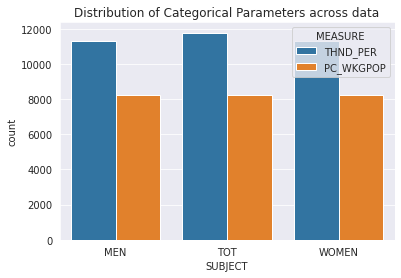

In [ ]:
# Distribution of Categorical Parameters 
plt.title("Distribution of Categorical Parameters across data") 
sns.countplot(x=empdata["SUBJECT"],hue=empdata["MEASURE"])

In [ ]:
# Sorting the data as per time
empdata.sort_values("TIME")

,LOCATION,SUBJECT,MEASURE,FREQUENCY,TIME,Value
6853,USA,WOMEN,PC_WKGPOP,A,1955,37.40375
6786,USA,TOT,PC_WKGPOP,A,1955,61.46822
3457,JPN,TOT,THND_PER,A,1955,40895.83000
6518,USA,MEN,THND_PER,A,1955,42621.17000
6364,GBR,WOMEN,THND_PER,A,1955,0.00000
...,...,...,...,...,...,...
24899,ESP,MEN,THND_PER,Q,2022-Q1,10889.02000
12008,CAN,WOMEN,PC_WKGPOP,Q,2022-Q1,71.96667
56274,LVA,MEN,PC_WKGPOP,Q,2022-Q1,71.78189
30074,EST,TOT,THND_PER,Q,2022-Q1,678.14840


In [ ]:
# Splitting data on basis of year month and quarter wise
annual_data = empdata[(empdata["FREQUENCY"]=="A")]
quarter_data = empdata[empdata["FREQUENCY"]=="Q"]
month_data = empdata[empdata["FREQUENCY"]=="M"]

In [ ]:
  df_emp= empdata[(empdata["FREQUENCY"]=="A") & (empdata["MEASURE"]== "THND_PER") & (empdata["SUBJECT"]== "TOT")]
  df_emp=df_emp.drop(["SUBJECT","MEASURE","FREQUENCY"],axis=1)
  df_emp

,LOCATION,TIME,Value
57,AUS,1964,4495.500
58,AUS,1965,4628.250
59,AUS,1966,4785.150
60,AUS,1967,4928.000
61,AUS,1968,5046.225
...,...,...,...
58119,CRI,2017,2051.237
58120,CRI,2018,2117.052
58121,CRI,2019,2175.098
58122,CRI,2020,1938.173


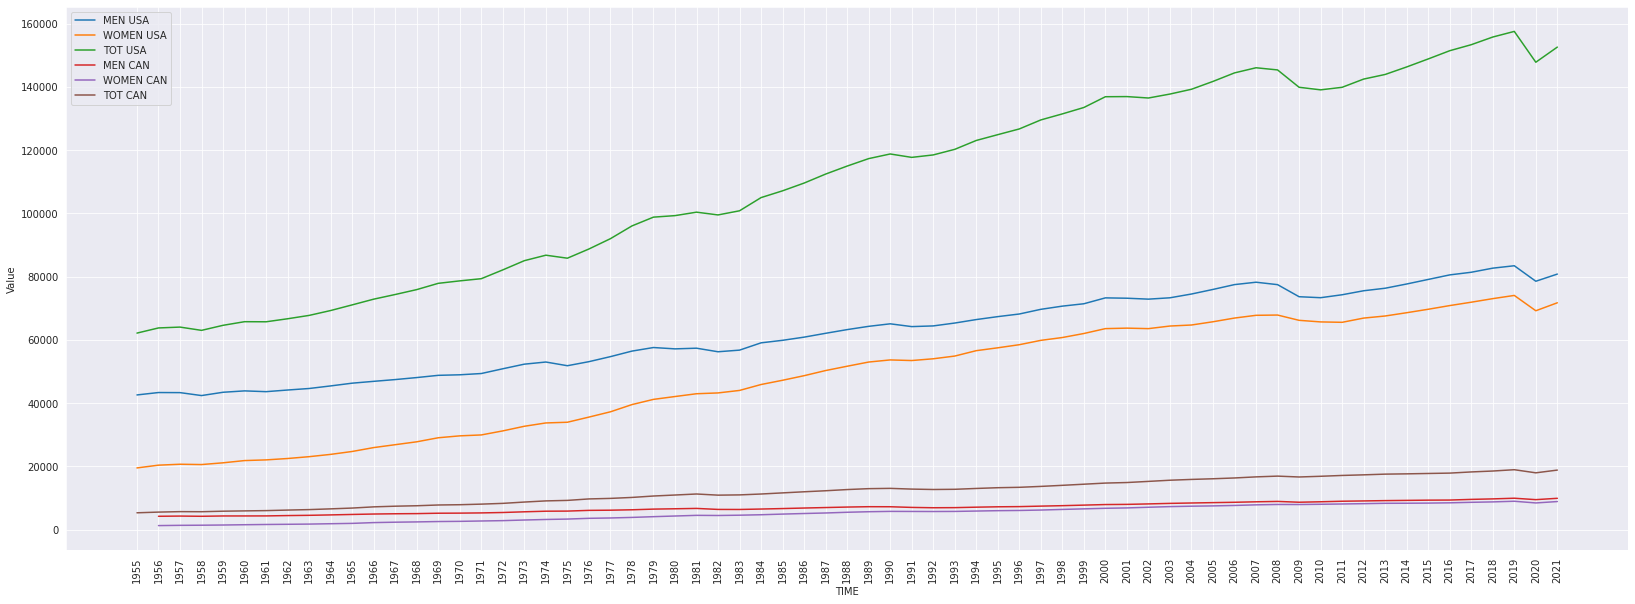

In [ ]:
# function to see the variation in employment across countries year wise
def emp_rate_annual(country,measure):
  x = empdata[(empdata["FREQUENCY"]=="A") & (empdata["LOCATION"]== country) & (empdata["MEASURE"]== measure) & (empdata["SUBJECT"]=="WOMEN")]
  y = empdata[(empdata["FREQUENCY"]=="A") & (empdata["LOCATION"]== country) & (empdata["MEASURE"]== measure) & (empdata["SUBJECT"]== "TOT")]
  z = empdata[(empdata["FREQUENCY"]=="A") & (empdata["LOCATION"]== country) & (empdata["MEASURE"]== measure) & (empdata["SUBJECT"]== "MEN")]
  sns.lineplot(x="TIME", y="Value", data =z,label = 'MEN '+country)
  sns.lineplot(x="TIME", y="Value", data =x,label = 'WOMEN '+country)
  sns.lineplot(x="TIME", y="Value", data =y,label = 'TOT '+country)
  plt.xticks(rotation=90)

#Study about annual data of USA
plt.figure(figsize=(28,10))
emp_rate_annual("USA", "THND_PER")
emp_rate_annual("CAN", "THND_PER")

In [ ]:
#splitting the TIME column and making two columns year and type 
empdata1=empdata.copy()
empdata1.drop("FREQUENCY", inplace = True, axis = 1)
empdata1[["Year","Type"]] = empdata1.TIME.str.split("-", expand = True)
empdata1.drop("TIME", axis =1 , inplace = True)
empdata1.Type.fillna(value = "Ann", inplace = True)
empdata1.head()

,LOCATION,SUBJECT,MEASURE,Value,Year,Type
0,AUS,MEN,THND_PER,3346.5,1965,Ann
1,AUS,MEN,THND_PER,3362.5,1966,Ann
2,AUS,MEN,THND_PER,3412.5,1967,Ann
3,AUS,MEN,THND_PER,3474.0,1968,Ann
4,AUS,MEN,THND_PER,3548.0,1969,Ann


In [ ]:
# Quarter wise analysis
emp_q_1=empdata1.copy()
emp_q_1 = empdata1[empdata1["Type"].isin(["Q1","Q2","Q3","Q4"])]
emp_q_1.head()                     

,LOCATION,SUBJECT,MEASURE,Value,Year,Type
7803,AUS,MEN,THND_PER,3330.794,1965,Q1
7804,AUS,MEN,THND_PER,3341.801,1965,Q2
7805,AUS,MEN,THND_PER,3352.472,1965,Q3
7806,AUS,MEN,THND_PER,3361.362,1965,Q4
7807,AUS,MEN,THND_PER,3339.372,1966,Q1


In [ ]:
# function to see the variation of EMP value w.r.t quarters
def emp_quat(country,measure,Year):
  x = emp_q_1[(emp_q_1["LOCATION"]== country) & (emp_q_1["LOCATION"]== country) & (emp_q_1["MEASURE"]== measure) & (emp_q_1["SUBJECT"]=="WOMEN")]
  y = emp_q_1[(emp_q_1["LOCATION"]== country) & (emp_q_1["LOCATION"]== country) & (emp_q_1["MEASURE"]== measure) & (emp_q_1["SUBJECT"]== "MEN")]
  z=  emp_q_1[(emp_q_1["LOCATION"]== country) & (emp_q_1["LOCATION"]== country) & (emp_q_1["MEASURE"]== measure) & (emp_q_1["SUBJECT"]== "TOT")]
  sns.lineplot(x="Type", y="Value", data =x, label = 'WOMEN '+country)
  sns.lineplot(x="Type", y="Value", data =y, label = 'MEN '+country)
  sns.lineplot(x="Type", y="Value", data =y, label = 'TOT '+country)
  plt.axhline(0, color = 'red')
  plt.axvline(0, color = 'red')

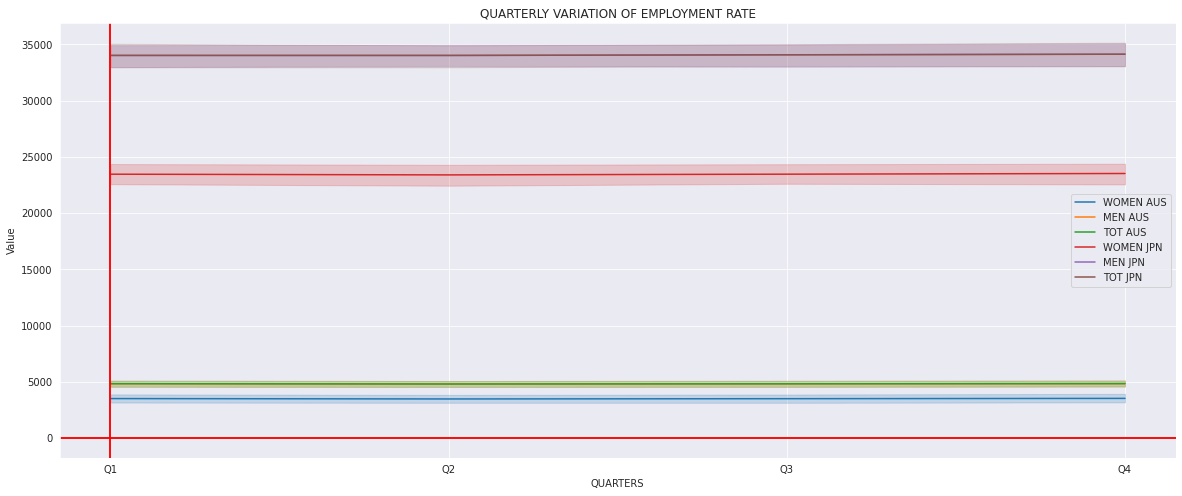

In [ ]:
# Quarter wise analysis
plt.figure(figsize=(20,8))
plt.title("QUARTERLY VARIATION OF EMPLOYMENT RATE")
plt.xlabel("QUARTERS")
emp_quat("AUS", "THND_PER","2020")
emp_quat("JPN", "THND_PER","2020")


In [ ]:
# Month-wise analysis
emp_m_1=empdata1.copy()
emp_m_1 = empdata1[empdata1["Type"].isin(["01","02","03","04","05","06","07","08","09","10","11","12"])]
emp_m_1.head() 

,LOCATION,SUBJECT,MEASURE,Value,Year,Type
32512,AUS,MEN,THND_PER,3885.000,1978,01
32513,AUS,MEN,THND_PER,3881.244,1978,02
32514,AUS,MEN,THND_PER,3884.852,1978,03
32515,AUS,MEN,THND_PER,3888.799,1978,04
32516,AUS,MEN,THND_PER,3885.961,1978,05


In [ ]:
# function to see the variation of PPI value w.r.t quarters
def emp_month(country,measure,Year):
 x = emp_m_1[(emp_m_1["LOCATION"]== country) & (emp_m_1["LOCATION"]== country) & (emp_m_1["MEASURE"]== measure) & (emp_m_1["SUBJECT"]=="WOMEN")]
 y = emp_m_1[(emp_m_1["LOCATION"]== country) & (emp_m_1["LOCATION"]== country) & (emp_m_1["MEASURE"]== measure) & (emp_m_1["SUBJECT"]== "MEN")]
 z=  emp_m_1[(emp_m_1["LOCATION"]== country) & (emp_m_1["LOCATION"]== country) & (emp_m_1["MEASURE"]== measure) & (emp_m_1["SUBJECT"]== "TOT")]
 sns.lineplot(x="Type", y="Value", data =x, label = 'WOMEN '+country)
 sns.lineplot(x="Type", y="Value", data =y, label = 'MEN '+country)
 sns.lineplot(x="Type", y="Value", data =y, label = 'TOT '+country)
 plt.axhline(0, color = 'red')
 plt.axvline(0, color = 'red')

In [ ]:
plt.figure(figsize=(20,8))
plt.title("MONTHLY VARIATION OF EMPLOYMENT RATE")
plt.xlabel("MONTHS")
emp_month("JPN", "THND_PER","2020")
emp_month("CAN", "THND_PER","2020")
emp_month("GBR", "THND_PER","2020")


Converting categorical columns into numerical columns.

In [ ]:
#Encoding of location based on value counts as all value counts are unique
empdata = OHE(empdata1, "LOCATION")
empdata1.head()

In [ ]:
# One hot encoding
OH_2=pd.get_dummies(empdata1[["SUBJECT","MEASURE","Type"]],drop_first=0)
object_cl_HE= ["SUBJECT","MEASURE","Type"]
Xdrop = empdata1.drop(object_cl_HE,axis=1)

empdata1=pd.concat([OH_2,Xdrop],axis=1)
empdata1.head()

EMP analysis done

Standardizing/Scaling of Index value based on the two types of measurement

In [ ]:
# Bifurcating MEASURE_PC_WKGPOP measurements and MEASURE_THND_PER measurements
emp_thndper_data=empdata1[empdata1["MEASURE_THND_PER"]==1]
print(emp_thndper_data.head())
emp_pcwkg_data=empdata1[empdata1["MEASURE_PC_WKGPOP"]==1]
print(emp_pcwkg_data.head())

In [ ]:
# standardizing ppi_idx_data
normal(emp_thndper_data,"Value")
# standardizing ppi_agrwth_data
normal(emp_pcwkg_data,"Value")
# concatenating both data
emp_data2=pd.concat([emp_thndper_data,emp_pcwkg_data],axis=0)
emp_data2.head()

# **GDP ANALYSIS**











#                                                         

In [ ]:
gdp_data= pd.read_csv("/content/grive/MyDrive/Colab Notebooks/Technical and Economics Data/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4150784/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4150784.csv",index_col="Country Code", skiprows=3)
gdp_data.head()

,Country Name,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,Aruba,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN,NaN,NaN
AFE,Africa Eastern and Southern,GDP (current US$),NY.GDP.MKTP.CD,2.008272e+10,2.050945e+10,2.235043e+10,2.675866e+10,2.446499e+10,2.787894e+10,3.031384e+10,...,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11,NaN,NaN
AFG,Afghanistan,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,...,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN,NaN
AFW,Africa Western and Central,GDP (current US$),NY.GDP.MKTP.CD,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,1.583285e+10,...,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11,NaN,NaN
AGO,Angola,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10,NaN,NaN


In [ ]:
gdp_data.columns

Index(['Country Name', 'Indicator Name', 'Indicator Code', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', 'Unnamed: 66'],
      dtype='object')

In [ ]:
# basic information
gdp_data.dtypes
gdp_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, ABW to ZWE
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Indicator Name  266 non-null    object 
 2   Indicator Code  266 non-null    object 
 3   1960            132 non-null    float64
 4   1961            134 non-null    float64
 5   1962            137 non-null    float64
 6   1963            137 non-null    float64
 7   1964            137 non-null    float64
 8   1965            148 non-null    float64
 9   1966            151 non-null    float64
 10  1967            154 non-null    float64
 11  1968            159 non-null    float64
 12  1969            159 non-null    float64
 13  1970            168 non-null    float64
 14  1971            171 non-null    float64
 15  1972            171 non-null    float64
 16  1973            171 non-null    float64
 17  1974            172 non-null    float6

In [ ]:
#  checking missing values
miss_value=gdp_data.isnull().sum()
miss_value

Country Name        0
Indicator Name      0
Indicator Code      0
1960              134
1961              132
                 ... 
2018               10
2019               13
2020               24
2021              266
Unnamed: 66       266
Length: 66, dtype: int64

In [ ]:
# cleaning not reqd. data
gdp_new=gdp_data.copy()
gdp_new.drop(["Indicator Code","Country Name","Indicator Name","2021","Unnamed: 66"], inplace=True, axis=1)
gdp_new.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
AFE,2.008272e+10,2.050945e+10,2.235043e+10,2.675866e+10,2.446499e+10,2.787894e+10,3.031384e+10,3.137555e+10,3.418718e+10,3.924842e+10,...,9.433782e+11,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11
AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,...,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10
AFW,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,1.583285e+10,1.442643e+10,1.488035e+10,1.688209e+10,...,6.709626e+11,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11
AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10


In [ ]:
check1= gdp_new.index.unique()
check1

Index(['ABW', 'AFE', 'AFG', 'AFW', 'AGO', 'ALB', 'AND', 'ARB', 'ARE', 'ARG',
       ...
       'VIR', 'VNM', 'VUT', 'WLD', 'WSM', 'XKX', 'YEM', 'ZAF', 'ZMB', 'ZWE'],
      dtype='object', name='Country Code', length=266)

In [ ]:
# extracting countries as same with ppi dataset
s=[]
for i in check3:
  for j in check1:
    if i==j:
      s.append(i)
print(s)
len(s)           

['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX', 'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE', 'TUR', 'GBR', 'USA', 'BRA', 'CHL', 'EST', 'IDN', 'ISR', 'RUS', 'SVN', 'ZAF', 'COL', 'LVA', 'LTU', 'CRI']


42

In [ ]:
gdp_last=gdp_new.loc[s,:]
gdp_last

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Code,,,,,,,,,,,,,,,,,,,,,
AUS,1.860679e+10,1.968306e+10,1.992272e+10,2.153993e+10,2.380110e+10,2.597715e+10,2.730989e+10,3.044462e+10,3.271699e+10,3.668608e+10,...,1.397908e+12,1.546509e+12,1.576335e+12,1.467505e+12,1.350534e+12,1.206685e+12,1.326883e+12,1.428530e+12,1.391953e+12,1.327836e+12
AUT,6.592694e+09,7.311750e+09,7.756110e+09,8.374175e+09,9.169984e+09,9.994071e+09,1.088768e+10,1.157943e+10,1.244063e+10,1.358280e+10,...,4.316852e+11,4.094018e+11,4.301910e+11,4.425848e+11,3.819711e+11,3.958374e+11,4.172612e+11,4.551682e+11,4.450119e+11,4.332585e+11
BEL,1.165872e+10,1.240015e+10,1.326402e+10,1.426002e+10,1.596011e+10,1.737146e+10,1.865188e+10,1.999204e+10,2.137635e+10,2.371074e+10,...,5.233304e+11,4.961529e+11,5.217910e+11,5.353902e+11,4.623356e+11,4.760628e+11,5.027647e+11,5.432738e+11,5.352887e+11,5.218613e+11
CAN,4.046172e+10,4.093495e+10,4.222745e+10,4.502999e+10,4.937752e+10,5.451518e+10,6.108838e+10,6.566866e+10,7.182981e+10,7.914841e+10,...,1.793327e+12,1.828366e+12,1.846597e+12,1.805750e+12,1.556509e+12,1.527995e+12,1.649266e+12,1.725329e+12,1.742015e+12,1.645423e+12
CZE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.295627e+11,2.088577e+11,2.116856e+11,2.093588e+11,1.880331e+11,1.962721e+11,2.186289e+11,2.489501e+11,2.524980e+11,2.453393e+11
DNK,NaN,NaN,NaN,NaN,NaN,NaN,1.193174e+10,1.305906e+10,1.350557e+10,1.541490e+10,...,3.440031e+11,3.271489e+11,3.435844e+11,3.529936e+11,3.026731e+11,3.131159e+11,3.321211e+11,3.568412e+11,3.475613e+11,3.560849e+11
FIN,5.224102e+09,5.921659e+09,6.340581e+09,6.885920e+09,7.766655e+09,8.589340e+09,9.208525e+09,9.368954e+09,8.823034e+09,1.007077e+10,...,2.756044e+11,2.582901e+11,2.713624e+11,2.748628e+11,2.345344e+11,2.407714e+11,2.556480e+11,2.757151e+11,2.685082e+11,2.695948e+11
FRA,6.222548e+10,6.746164e+10,7.560753e+10,8.475920e+10,9.400785e+10,1.015372e+11,1.100459e+11,1.189730e+11,1.297854e+11,1.419031e+11,...,2.865158e+12,2.683672e+12,2.811877e+12,2.855964e+12,2.439189e+12,2.472964e+12,2.595151e+12,2.790957e+12,2.728870e+12,2.630318e+12
DEU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.749315e+12,3.527143e+12,3.733805e+12,3.889093e+12,3.357586e+12,3.469853e+12,3.690849e+12,3.977289e+12,3.888327e+12,3.846414e+12


Text(0.5, 1.0, 'Missing GDP')

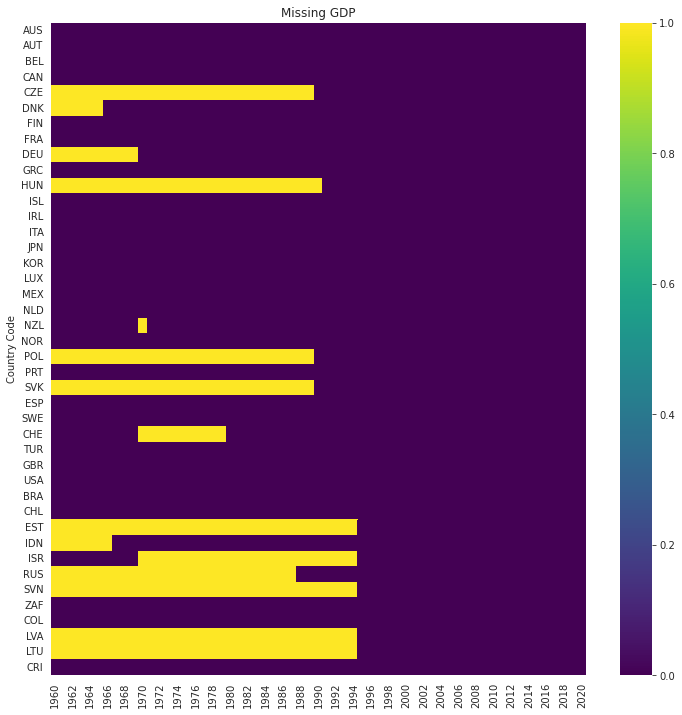

In [ ]:
# checking of missing values of GDP across years
plt.figure(figsize=(12,12))
sns.heatmap(gdp_last.isnull(), cmap="viridis")
plt.title("Missing GDP")

In [ ]:
df_1=gdp_last.fillna(method="bfill",axis=0)
df_1

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Code,,,,,,,,,,,,,,,,,,,,,
AUS,1.860679e+10,1.968306e+10,1.992272e+10,2.153993e+10,2.380110e+10,2.597715e+10,2.730989e+10,3.044462e+10,3.271699e+10,3.668608e+10,...,1.397908e+12,1.546509e+12,1.576335e+12,1.467505e+12,1.350534e+12,1.206685e+12,1.326883e+12,1.428530e+12,1.391953e+12,1.327836e+12
AUT,6.592694e+09,7.311750e+09,7.756110e+09,8.374175e+09,9.169984e+09,9.994071e+09,1.088768e+10,1.157943e+10,1.244063e+10,1.358280e+10,...,4.316852e+11,4.094018e+11,4.301910e+11,4.425848e+11,3.819711e+11,3.958374e+11,4.172612e+11,4.551682e+11,4.450119e+11,4.332585e+11
BEL,1.165872e+10,1.240015e+10,1.326402e+10,1.426002e+10,1.596011e+10,1.737146e+10,1.865188e+10,1.999204e+10,2.137635e+10,2.371074e+10,...,5.233304e+11,4.961529e+11,5.217910e+11,5.353902e+11,4.623356e+11,4.760628e+11,5.027647e+11,5.432738e+11,5.352887e+11,5.218613e+11
CAN,4.046172e+10,4.093495e+10,4.222745e+10,4.502999e+10,4.937752e+10,5.451518e+10,6.108838e+10,6.566866e+10,7.182981e+10,7.914841e+10,...,1.793327e+12,1.828366e+12,1.846597e+12,1.805750e+12,1.556509e+12,1.527995e+12,1.649266e+12,1.725329e+12,1.742015e+12,1.645423e+12
CZE,5.224102e+09,5.921659e+09,6.340581e+09,6.885920e+09,7.766655e+09,8.589340e+09,1.193174e+10,1.305906e+10,1.350557e+10,1.541490e+10,...,2.295627e+11,2.088577e+11,2.116856e+11,2.093588e+11,1.880331e+11,1.962721e+11,2.186289e+11,2.489501e+11,2.524980e+11,2.453393e+11
DNK,5.224102e+09,5.921659e+09,6.340581e+09,6.885920e+09,7.766655e+09,8.589340e+09,1.193174e+10,1.305906e+10,1.350557e+10,1.541490e+10,...,3.440031e+11,3.271489e+11,3.435844e+11,3.529936e+11,3.026731e+11,3.131159e+11,3.321211e+11,3.568412e+11,3.475613e+11,3.560849e+11
FIN,5.224102e+09,5.921659e+09,6.340581e+09,6.885920e+09,7.766655e+09,8.589340e+09,9.208525e+09,9.368954e+09,8.823034e+09,1.007077e+10,...,2.756044e+11,2.582901e+11,2.713624e+11,2.748628e+11,2.345344e+11,2.407714e+11,2.556480e+11,2.757151e+11,2.685082e+11,2.695948e+11
FRA,6.222548e+10,6.746164e+10,7.560753e+10,8.475920e+10,9.400785e+10,1.015372e+11,1.100459e+11,1.189730e+11,1.297854e+11,1.419031e+11,...,2.865158e+12,2.683672e+12,2.811877e+12,2.855964e+12,2.439189e+12,2.472964e+12,2.595151e+12,2.790957e+12,2.728870e+12,2.630318e+12
DEU,4.335186e+09,4.961400e+09,5.213048e+09,5.895278e+09,6.669673e+09,7.689154e+09,8.591518e+09,9.275601e+09,1.009068e+10,1.161566e+10,...,3.749315e+12,3.527143e+12,3.733805e+12,3.889093e+12,3.357586e+12,3.469853e+12,3.690849e+12,3.977289e+12,3.888327e+12,3.846414e+12


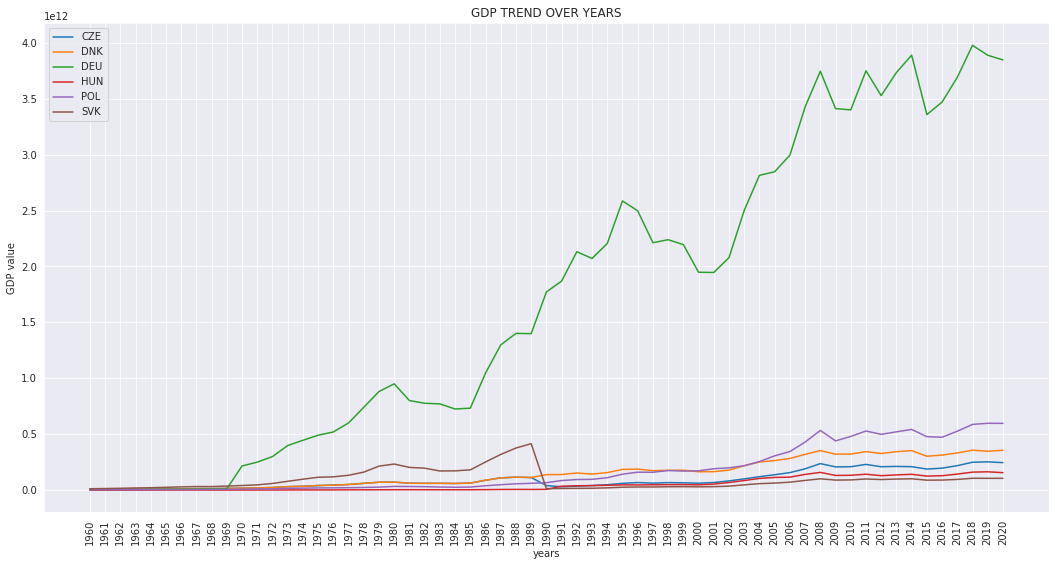

In [ ]:
# plotting the trend of GDP
plt.figure(figsize=(18,9))
plt.xlabel("years")
plt.ylabel("GDP value")
plt.xticks(rotation=90)
plt.title("GDP TREND OVER YEARS")
sns.lineplot(x=df_1.columns, y=df_1.loc["CZE","1960":],label="CZE")
sns.lineplot(x=df_1.columns, y=df_1.loc["DNK","1960":],label="DNK")
sns.lineplot(x=df_1.columns, y=df_1.loc["DEU","1960":],label="DEU")
sns.lineplot(x=df_1.columns, y=df_1.loc["HUN","1960":],label="HUN")
sns.lineplot(x=df_1.columns, y=df_1.loc["POL","1960":],label="POL")
sns.lineplot(x=df_1.columns, y=df_1.loc["SVK","1960":],label="SVK")

In [ ]:
gdp_final=df_1.T
gdp_final

Country Code,AUS,AUT,BEL,CAN,CZE,DNK,FIN,FRA,DEU,GRC,...,EST,IDN,ISR,RUS,SVN,ZAF,COL,LVA,LTU,CRI
1960,1.860679e+10,6.592694e+09,1.165872e+10,4.046172e+10,5.224102e+09,5.224102e+09,5.224102e+09,6.222548e+10,4.335186e+09,4.335186e+09,...,2.598500e+09,2.598500e+09,2.598500e+09,7.575397e+09,7.575397e+09,7.575397e+09,4.031153e+09,5.075138e+08,5.075138e+08,5.075138e+08
1961,1.968306e+10,7.311750e+09,1.240015e+10,4.093495e+10,5.921659e+09,5.921659e+09,5.921659e+09,6.746164e+10,4.961400e+09,4.961400e+09,...,3.138500e+09,3.138500e+09,3.138500e+09,7.972997e+09,7.972997e+09,7.972997e+09,4.540448e+09,4.903252e+08,4.903252e+08,4.903252e+08
1962,1.992272e+10,7.756110e+09,1.326402e+10,4.222745e+10,6.340581e+09,6.340581e+09,6.340581e+09,7.560753e+10,5.213048e+09,5.213048e+09,...,2.510000e+09,2.510000e+09,2.510000e+09,8.497997e+09,8.497997e+09,8.497997e+09,4.955544e+09,4.791808e+08,4.791808e+08,4.791808e+08
1963,2.153993e+10,8.374175e+09,1.426002e+10,4.502999e+10,6.885920e+09,6.885920e+09,6.885920e+09,8.475920e+10,5.895278e+09,5.895278e+09,...,2.992333e+09,2.992333e+09,2.992333e+09,9.423396e+09,9.423396e+09,9.423396e+09,4.836167e+09,5.119021e+08,5.119021e+08,5.119021e+08
1964,2.380110e+10,9.169984e+09,1.596011e+10,4.937752e+10,7.766655e+09,7.766655e+09,7.766655e+09,9.400785e+10,6.669673e+09,6.669673e+09,...,3.405333e+09,3.405333e+09,3.405333e+09,1.037400e+10,1.037400e+10,1.037400e+10,5.973367e+09,5.425784e+08,5.425784e+08,5.425784e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,1.206685e+12,3.958374e+11,4.760628e+11,1.527995e+12,1.962721e+11,3.131159e+11,2.407714e+11,2.472964e+12,3.469853e+12,1.931481e+11,...,2.407283e+10,9.318774e+11,3.190244e+11,1.276787e+12,4.476672e+10,3.235855e+11,2.828250e+11,2.808360e+10,4.304731e+10,5.884702e+10
2017,1.326883e+12,4.172612e+11,5.027647e+11,1.649266e+12,2.186289e+11,3.321211e+11,2.556480e+11,2.595151e+12,3.690849e+12,1.998444e+11,...,2.692439e+10,1.015619e+12,3.552772e+11,1.574199e+12,4.858910e+10,3.814488e+11,3.118837e+11,3.048381e+10,4.775874e+10,6.051604e+10
2018,1.428530e+12,4.551682e+11,5.432738e+11,1.725329e+12,2.489501e+11,3.568412e+11,2.757151e+11,2.790957e+12,3.977289e+12,2.120494e+11,...,3.048950e+10,1.042272e+12,3.736412e+11,1.657329e+12,5.416359e+10,4.048421e+11,3.341982e+11,3.442902e+10,5.375091e+10,6.242017e+10
2019,1.391953e+12,4.450119e+11,5.352887e+11,1.742015e+12,2.524980e+11,3.475613e+11,2.685082e+11,2.728870e+12,3.888327e+12,2.051442e+11,...,3.104559e+10,1.119091e+12,3.979346e+11,1.687449e+12,5.417888e+10,3.879346e+11,3.234299e+11,3.430878e+10,5.469738e+10,6.407287e+10


In [ ]:
# Standardizing
# std_scale=StandardScaler(copy=True, with_mean=True, with_std=True)
# for country in s:
#   gdp_final[country]=std_scale.fit_transform(gdp_final[[country]])
# gdp_final.head()  
# gdp_final=gdp_final.T
# gdp_final.head()

In [ ]:
# Normalizing
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
def normcc(Countrycode):
    df1=scaler.fit_transform(np.array(gdp_final[Countrycode]).reshape(-1,1))
    return df1
df_3=normcc("CAN")
df_3

array([[0.00000000e+00],
       [2.62012634e-04],
       [9.77626398e-04],
       [2.52930434e-03],
       [4.93639609e-03],
       [7.78095349e-03],
       [1.14203281e-02],
       [1.39562790e-02],
       [1.73675150e-02],
       [2.14195921e-02],
       [2.62629068e-02],
       [3.25613630e-02],
       [4.02079970e-02],
       [5.03063735e-02],
       [6.64108326e-02],
       [7.38440129e-02],
       [9.19719616e-02],
       [9.47605627e-02],
       [9.86477073e-02],
       [1.12178936e-01],
       [1.29221799e-01],
       [1.47139078e-01],
       [1.51176240e-01],
       [1.66148086e-01],
       [1.74356133e-01],
       [1.79551723e-01],
       [1.86573027e-01],
       [2.16404017e-01],
       [2.58503627e-01],
       [2.90451056e-01],
       [3.06437567e-01],
       [3.15516969e-01],
       [3.05583887e-01],
       [2.97158757e-01],
       [2.97694995e-01],
       [3.12030764e-01],
       [3.25603811e-01],
       [3.40243138e-01],
       [3.28623302e-01],
       [3.53212926e-01],


In [ ]:
from statsmodels.tsa.ar_model import AutoReg

ImportError: ignored

In [ ]:
len(df_3)

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df_3)*0.7)
test_size=len(df_3)-training_size
train_data,test_data=df_3[0:training_size,:],df_3[training_size:len(df_3),:1]
train_data

In [ ]:
test_data

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3,4,
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 7
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(ytest.shape)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(7,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=32,verbose=1)

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
print(train_predict)
print(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=7
trainPredictPlot = np.empty_like(df_3)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df_3)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_3)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_3))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()